### EDA data analysis 

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

#### 1. Import the datasets

In [20]:
train_path_labels = '../data/trainingset_labels.csv'
df_train_y = pd.read_csv(train_path_labels)

In [21]:
train_path_values = '../data/trainingset_values.csv'
df_train_x = pd.read_csv(train_path_values)

In [22]:
df_train_x.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [23]:
df_train_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55763 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59398 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

#### 2. Check which variables are in de dataset

##### 2.1 Y variable

The waterpumps have three possible functions: functional, functional repair, non functional


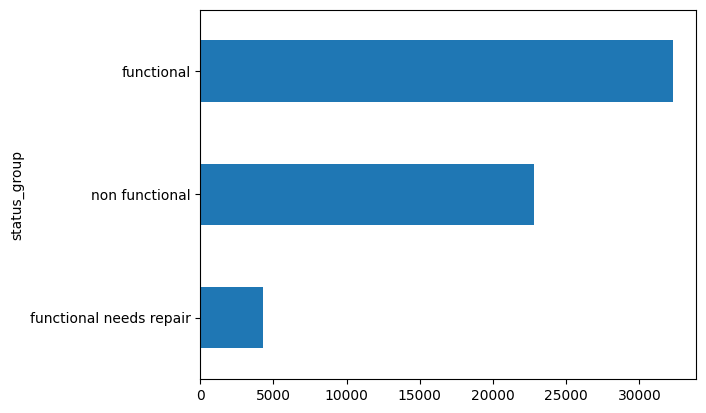

In [24]:
df_train_y['status_group'].value_counts().sort_values().plot(kind='barh')
print('The waterpumps have three possible functions: functional, functional repair, non functional')

In [25]:
df_train_x.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


##### 2.2 X variables

In [26]:
df_train_x = pd.concat([df_train_x.set_index('id'), df_train_y.set_index('id')], axis=1).reset_index()

In [29]:
# Only use latitude that we have , take away the non zeros
gdf = geopandas.GeoDataFrame(df_train_x.loc[df_train_x['latitude'] < -0.1], geometry=geopandas.points_from_xy(
    df_train_x.loc[df_train_x['latitude'] < -0.1, 'longitude'], df_train_x.loc[df_train_x['latitude'] < -0.1, 'latitude']))

/var/folders/1r/tdmn3kx53dxffhrmfbsld_4w0000gn/T/ipykernel_27948/2415114599.py:3: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))


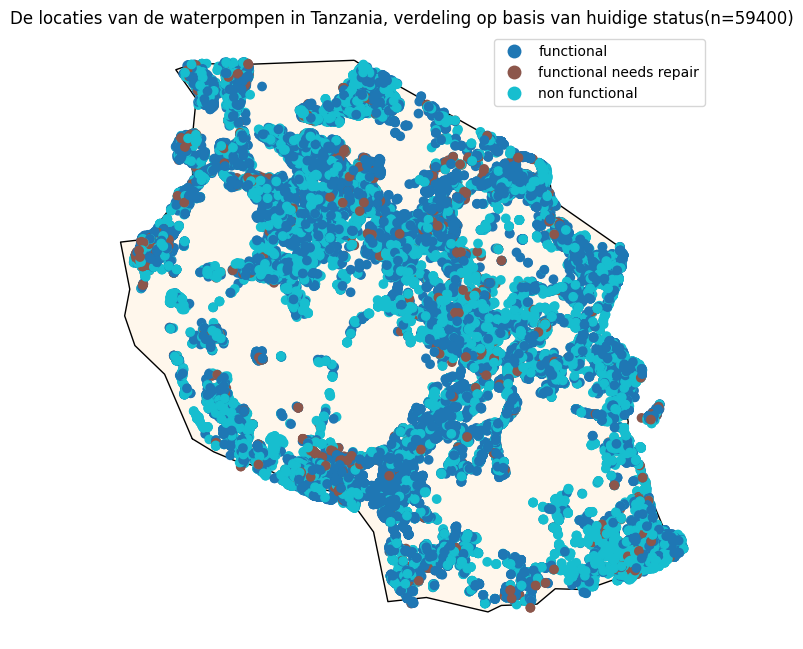

In [31]:
import matplotlib.patches as mpatches

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
tanzania =  world[world.name == "Tanzania"]

ax = tanzania.plot(color='white', edgecolor='black',figsize=(8, 8),cmap='OrRd')
gdf.plot(ax=ax, column='status_group', legend=True)
ax.set_axis_off()
plt.title('De locaties van de waterpompen in Tanzania, verdeling op basis van huidige status(n=59400)')
plt.show()

In [32]:
print('Het totaal aantal metingen in deze dataset is: ', df_train_x['id'].count())

Het totaal aantal metingen in deze dataset is:  59400


#### 3. Remove irrelevant columns and rows based on missing values(nans) and zero's.

The nr of missing values per variable


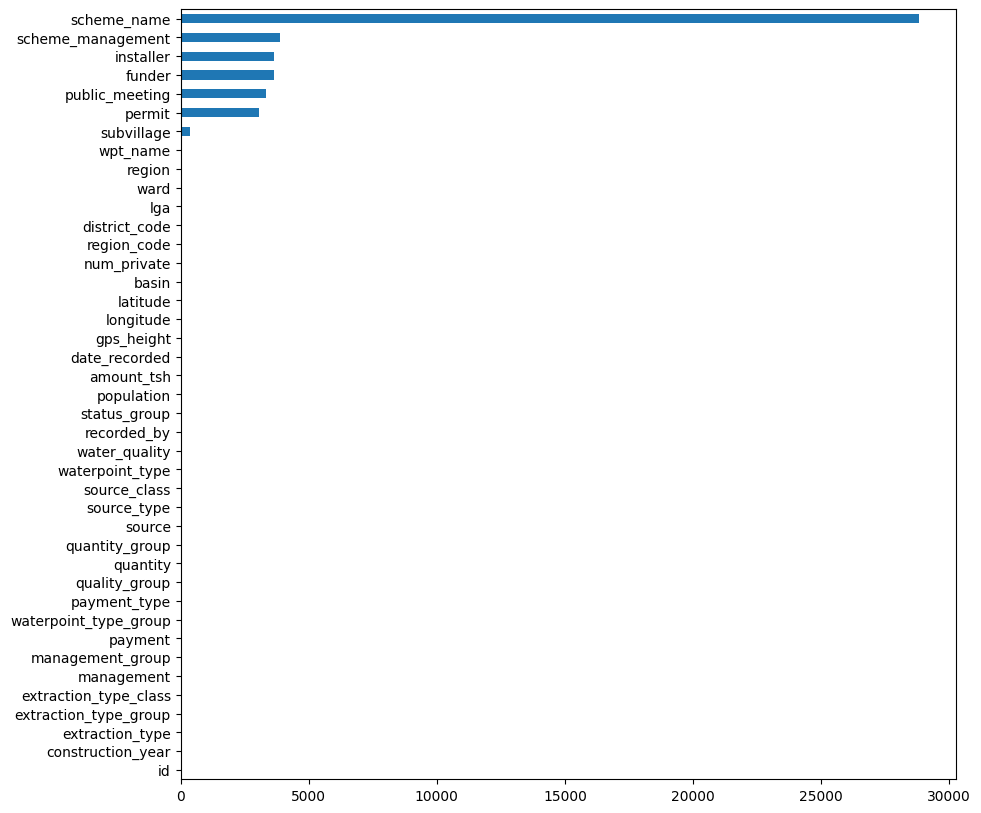

In [33]:
df_train_x.isnull().sum(axis=0).sort_values().plot(kind='barh',figsize=(10,10))
print('The nr of missing values per variable')

In [34]:
# # misisng values iin the following columns
# scheme_name, scheme_management, installer, funder, public_meeting, permit, subvillage

In [36]:
# fig, ax = plt.subplots(figsize=(7,5))
# ax = df_train_x['funder'].value_counts()[:20].sort_values().plot(kind='barh')
# plt.title('Top 20 people who funded the well')
# plt.show()

# print('Aantal missing values voor deze variabele is: ' , df_train_x['funder'].isnull().sum())

In [38]:
# fig, ax = plt.subplots(figsize=(7,5))
# ax = df_train_x['subvillage'].value_counts()[:20].sort_values().plot(kind='barh')
# plt.title('Subvillage Geographic location top 20')
# plt.show()

# print('Aantal missing values voor deze variabele is: ' , df_train_x['subvillage'].isnull().sum())

In [477]:
# fig, ax = plt.subplots(figsize=(7,5))
# ax = df_train_x['public_meeting'].value_counts().plot(kind='barh')
# plt.title('Public meeting true_false')
# plt.show()

# print('Aantal missing values voor deze variabele is: ' , df_train_x['public_meeting'].isnull().sum())

In [478]:
# fig, ax = plt.subplots(figsize=(7,5))
# ax = df_train_x['scheme_management'].value_counts()[:20].sort_values().plot(kind='barh')
# plt.title('scheme_management - Who operates the waterpoint')
# plt.show()

# print('Aantal missing values voor deze variabele is: ' , df_train_x['scheme_management'].isnull().sum())

In [479]:
# fig, ax = plt.subplots(figsize=(7,5))
# ax = df_train_x['installer'].value_counts()[:20].sort_values().plot(kind='barh')
# plt.title('Top 20 people who installed the well')
# plt.show()

# print('Aantal missing values voor deze variabele is: ' , df_train_x['installer'].isnull().sum())

In [480]:
# fig, ax = plt.subplots(figsize=(7,5))
# ax = df_train_x['scheme_name'].value_counts()[:20].sort_values().plot(kind='barh')
# plt.title('scheme_name - Who operates the waterpoint')
# plt.show()

# print('Aantal missing values voor deze variabele is: ' , df_train_x['scheme_name'].isnull().sum())

In [481]:
# fig, ax = plt.subplots(figsize=(7,5))
# ax = df_train_x['permit'].value_counts()[:20].sort_values().plot(kind='barh')
# plt.title('permit - If the waterpoint is permitted')
# plt.show()

# print('Aantal missing values voor deze variabele is: ' , df_train_x['permit'].isnull().sum())

In [40]:
# After some EDA remove columns with high amount of missing values or irrelevancy

df_train_x = df_train_x[['id', 'amount_tsh', 'date_recorded', 'gps_height',
        'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'recorded_by', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group', 'status_group']]

---------------

In [42]:
# check for zeros in the dataset
print('The numeric variables include null values. We need to inspect these a bit further.')
df_train_x.describe().T

The numeric variables include null values. We need to inspect these a bit further.


,count,mean,std,min,25%,50%,75%,max
id,59400.0,37115.131768,21453.128371,0.00000,18519.750000,37061.500000,55656.500000,7.424700e+04
amount_tsh,59400.0,317.650385,2997.574558,0.00000,0.000000,0.000000,20.000000,3.500000e+05
gps_height,59400.0,668.297239,693.116350,-90.00000,0.000000,369.000000,1319.250000,2.770000e+03
longitude,59400.0,34.077427,6.567432,0.00000,33.090347,34.908743,37.178387,4.034519e+01
latitude,59400.0,-5.706033,2.946019,-11.64944,-8.540621,-5.021597,-3.326156,-2.000000e-08
num_private,59400.0,0.474141,12.236230,0.00000,0.000000,0.000000,0.000000,1.776000e+03
region_code,59400.0,15.297003,17.587406,1.00000,5.000000,12.000000,17.000000,9.900000e+01
district_code,59400.0,5.629747,9.633649,0.00000,2.000000,3.000000,5.000000,8.000000e+01
population,59400.0,179.909983,471.482176,0.00000,0.000000,25.000000,215.000000,3.050000e+04
construction_year,59400.0,1300.652475,951.620547,0.00000,0.000000,1986.000000,2004.000000,2.013000e+03


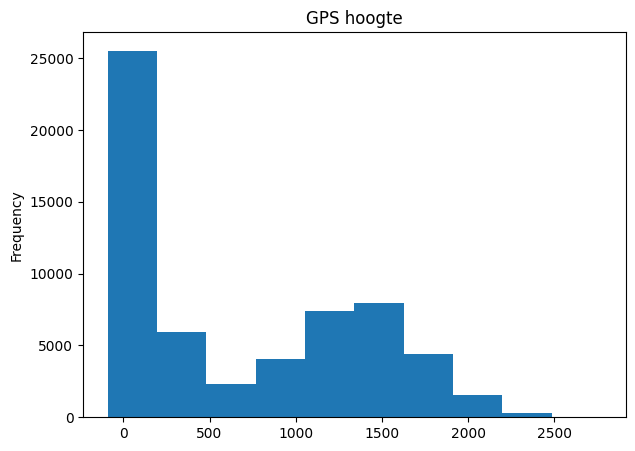

Aantal missing values voor deze variabele is:  0


In [44]:
fig, ax = plt.subplots(figsize=(7,5))
ax = df_train_x['gps_height'].plot(kind='hist')
plt.title('GPS hoogte')
plt.show()

print('Aantal missing values voor deze variabele is: ' , df_train_x['gps_height'].isnull().sum())

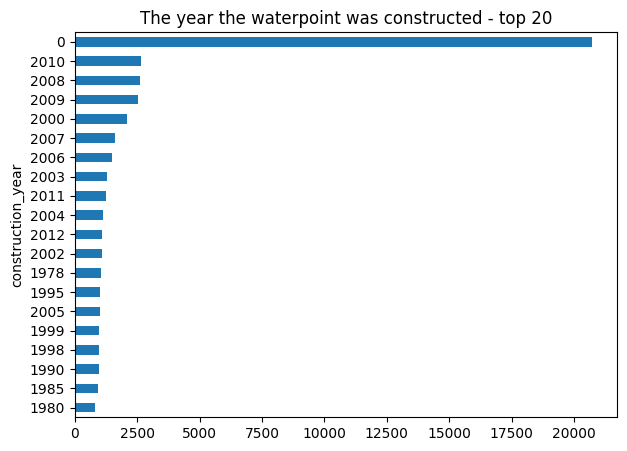

Aantal missing values voor deze variabele is:  0


In [45]:
fig, ax = plt.subplots(figsize=(7,5))
ax = df_train_x['construction_year'].value_counts()[:20].sort_values().plot(kind='barh')
plt.title('The year the waterpoint was constructed - top 20')
plt.show()

print('Aantal missing values voor deze variabele is: ' , df_train_x['construction_year'].isnull().sum())

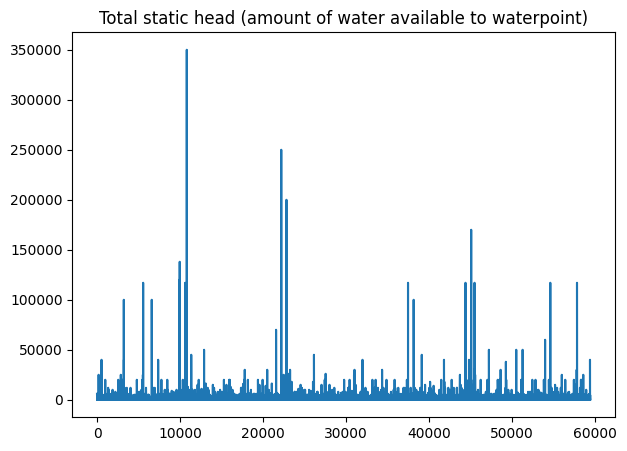

Aantal missing values voor deze variabele is:  0


In [46]:
fig, ax = plt.subplots(figsize=(7,5))
ax = df_train_x['amount_tsh'].plot(kind='line')
plt.title('Total static head (amount of water available to waterpoint)')
plt.show()

print('Aantal missing values voor deze variabele is: ' , df_train_x['amount_tsh'].isnull().sum())

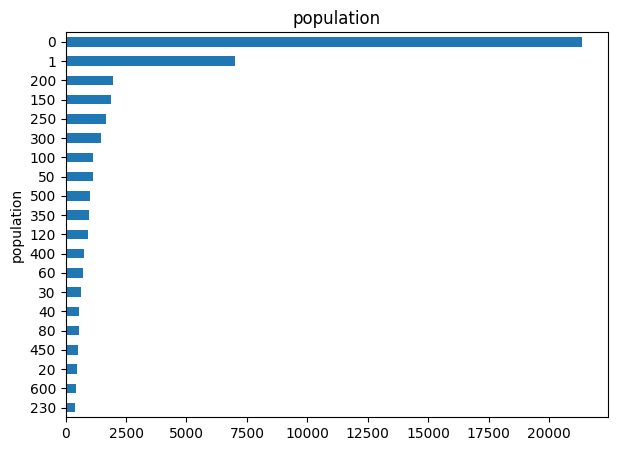

Aantal missing values voor deze variabele is:  0


In [47]:
fig, ax = plt.subplots(figsize=(7,5))
ax = df_train_x['population'].value_counts()[:20].sort_values().plot(kind='barh')
plt.title('population')
plt.show()

print('Aantal missing values voor deze variabele is: ' , df_train_x['population'].isnull().sum())

In [49]:
df_train_x = df_train_x.loc[df_train_x['gps_height'] != 0]
df_train_x = df_train_x.loc[df_train_x['construction_year'] != 0]
df_train_x = df_train_x.loc[df_train_x['amount_tsh'] != 0]
df_train_x = df_train_x.loc[df_train_x['population'] != 0]

In [540]:
# df_train_x = df_train_x.loc[df_train_x['longitude'] != 0]
# df_train_x = df_train_x.loc[df_train_x['num_private'] != 0]
# df_train_x = df_train_x.loc[df_train_x['district_code'] != 0]
# df_train_x = df_train_x.loc[df_train_x['district_code'] != 0]

#### 4. Decide which columns to further use in the analysis and which ones to drop

In [541]:
# fig, ax = plt.subplots(figsize=(7,5))
# ax = df_train_x['wpt_name'].value_counts()[:20].sort_values().plot(kind='barh')
# plt.title('Top 20 name of the waterpoint if there is one')
# plt.show()

# print('Aantal missing values voor deze variabele is: ' , df_train_x['wpt_name'].isnull().sum())

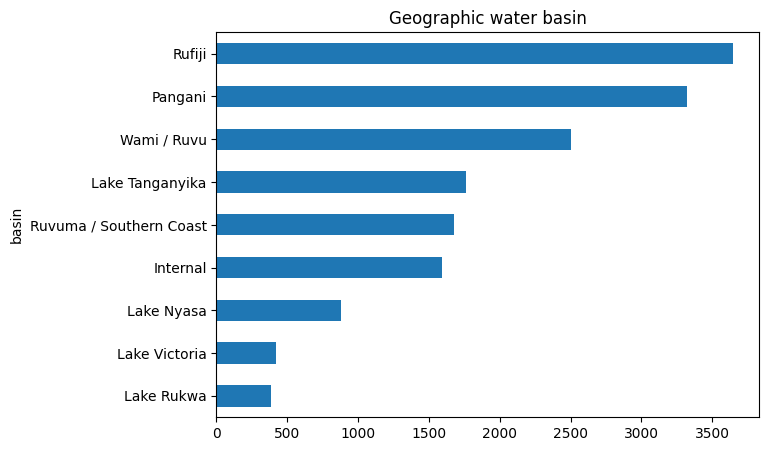

Aantal missing values voor deze variabele is:  0


In [50]:
fig, ax = plt.subplots(figsize=(7,5))
ax = df_train_x['basin'].value_counts().sort_values().plot(kind='barh')
plt.title('Geographic water basin')
plt.show()

print('Aantal missing values voor deze variabele is: ' , df_train_x['basin'].isnull().sum())

In [51]:
# fig, ax = plt.subplots(figsize=(7,5))
# ax = df_train_x['region'].value_counts()[:20].sort_values().plot(kind='barh')
# plt.title('Region Geographic location top 20')
# plt.show()

# print('Aantal missing values voor deze variabele is: ' , df_train_x['region'].isnull().sum())

In [52]:
# fig, ax = plt.subplots(figsize=(7,5))
# ax = df_train_x['lga'].value_counts()[:20].sort_values().plot(kind='barh')
# plt.title('lga Geographic location top 20')
# plt.show()

# print('Aantal missing values voor deze variabele is: ' , df_train_x['lga'].isnull().sum())

In [53]:
# fig, ax = plt.subplots(figsize=(7,5))
# ax = df_train_x['recorded_by'].value_counts()[:20].sort_values().plot(kind='barh')
# plt.title('recorded_by')
# plt.show()

# print('Aantal missing values voor deze variabele is: ' , df_train_x['recorded_by'].isnull().sum())

In [54]:
# fig, ax = plt.subplots(figsize=(7,5))
# ax = df_train_x['extraction_type'].value_counts().sort_values().plot(kind='barh')
# plt.title('extraction_type - The kind of extraction the waterpoint uses')
# plt.show()

# print('Aantal missing values voor deze variabele is: ' , df_train_x['extraction_type'].isnull().sum())

In [55]:
# fig, ax = plt.subplots(figsize=(7,5))
# ax = df_train_x['extraction_type'].value_counts().sort_values().plot(kind='barh')
# plt.title('extraction_type - The kind of extraction the waterpoint uses')
# plt.show()

# print('Aantal missing values voor deze variabele is: ' , df_train_x['extraction_type'].isnull().sum())

In [56]:
# fig, ax = plt.subplots(figsize=(7,5))
# ax = df_train_x['extraction_type_group'].value_counts().sort_values().plot(kind='barh')
# plt.title('extraction_type_group - The kind of extraction the waterpoint uses')
# plt.show()

# print('Aantal missing values voor deze variabele is: ' , df_train_x['extraction_type_group'].isnull().sum())

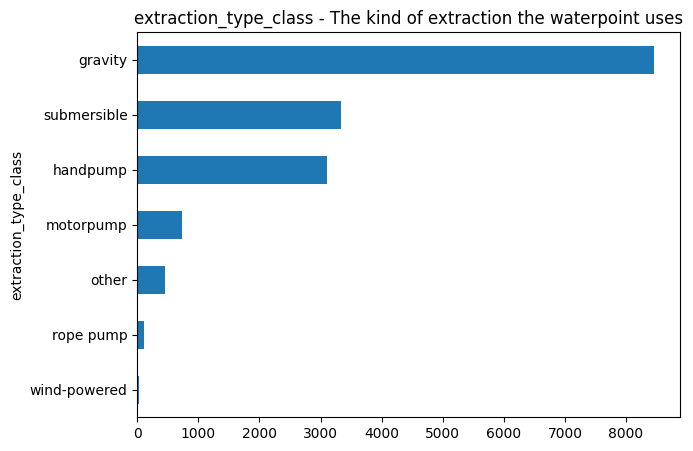

Aantal missing values voor deze variabele is:  0


In [57]:
fig, ax = plt.subplots(figsize=(7,5))
ax = df_train_x['extraction_type_class'].value_counts().sort_values().plot(kind='barh')
plt.title('extraction_type_class - The kind of extraction the waterpoint uses')
plt.show()

print('Aantal missing values voor deze variabele is: ' , df_train_x['extraction_type_class'].isnull().sum())

In [58]:
# fig, ax = plt.subplots(figsize=(7,5))
# ax = df_train_x['management'].value_counts().sort_values().plot(kind='barh')
# plt.title('management - How the waterpoint is managed')
# plt.show()

# print('Aantal missing values voor deze variabele is: ' , df_train_x['management'].isnull().sum())

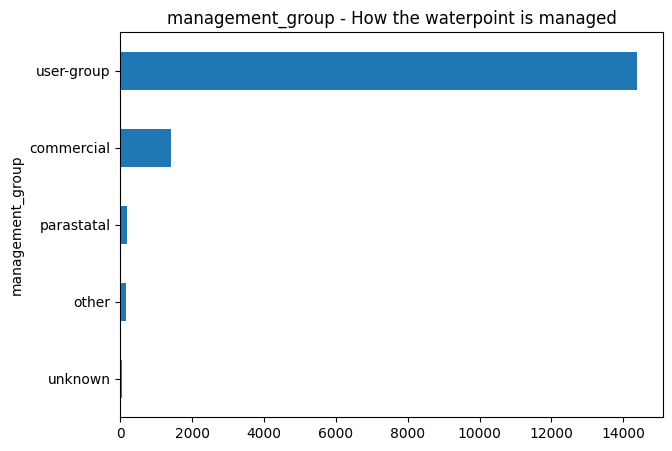

Aantal missing values voor deze variabele is:  0


In [59]:
fig, ax = plt.subplots(figsize=(7,5))
ax = df_train_x['management_group'].value_counts().sort_values().plot(kind='barh')
plt.title('management_group - How the waterpoint is managed')
plt.show()

print('Aantal missing values voor deze variabele is: ' , df_train_x['management_group'].isnull().sum())

In [60]:
# fig, ax = plt.subplots(figsize=(7,5))
# ax = df_train_x['payment'].value_counts().sort_values().plot(kind='barh')
# plt.title('payment - What the water costs')
# plt.show()

# print('Aantal missing values voor deze variabele is: ' , df_train_x['payment'].isnull().sum())

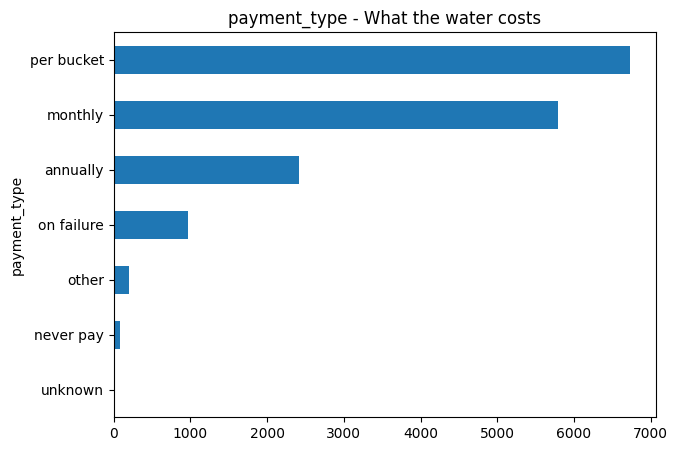

Aantal missing values voor deze variabele is:  0


In [61]:
fig, ax = plt.subplots(figsize=(7,5))
ax = df_train_x['payment_type'].value_counts().sort_values().plot(kind='barh')
plt.title('payment_type - What the water costs')
plt.show()

print('Aantal missing values voor deze variabele is: ' , df_train_x['payment_type'].isnull().sum())

In [62]:
# fig, ax = plt.subplots(figsize=(7,5))
# ax = df_train_x['water_quality'].value_counts().sort_values().plot(kind='barh')
# plt.title('water_quality - The quality of the water')
# plt.show()

# print('Aantal missing values voor deze variabele is: ' , df_train_x['water_quality'].isnull().sum())

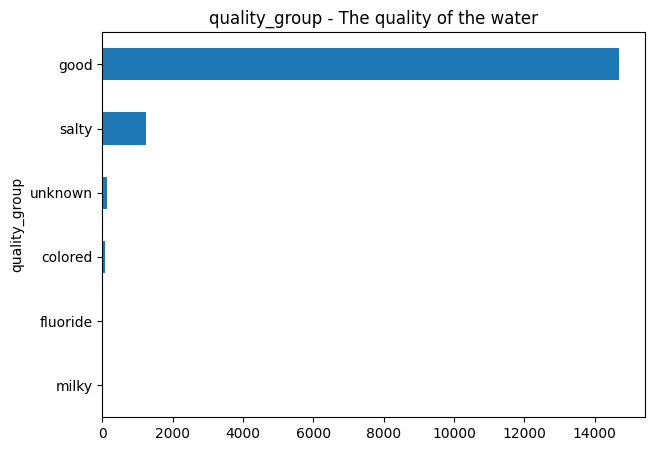

Aantal missing values voor deze variabele is:  0


In [63]:
fig, ax = plt.subplots(figsize=(7,5))
ax = df_train_x['quality_group'].value_counts().sort_values().plot(kind='barh')
plt.title('quality_group - The quality of the water')
plt.show()

print('Aantal missing values voor deze variabele is: ' , df_train_x['quality_group'].isnull().sum())

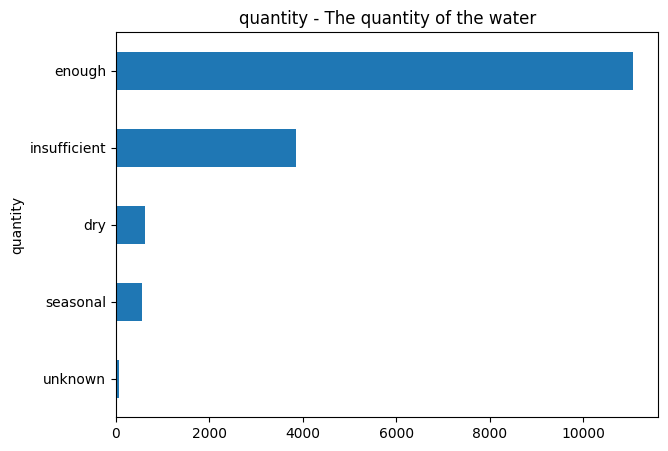

Aantal missing values voor deze variabele is:  0


In [64]:
fig, ax = plt.subplots(figsize=(7,5))
ax = df_train_x['quantity'].value_counts().sort_values().plot(kind='barh')
plt.title('quantity - The quantity of the water')
plt.show()

print('Aantal missing values voor deze variabele is: ' , df_train_x['quantity'].isnull().sum())

In [65]:
# fig, ax = plt.subplots(figsize=(7,5))
# ax = df_train_x['quantity_group'].value_counts().sort_values().plot(kind='barh')
# plt.title('quantity_group - The quantity of the water')
# plt.show()

# print('Aantal missing values voor deze variabele is: ' , df_train_x['quantity_group'].isnull().sum())

In [66]:
# fig, ax = plt.subplots(figsize=(7,5))
# ax = df_train_x['source'].value_counts().sort_values().plot(kind='barh')
# plt.title('source - The source of the water')
# plt.show()

# print('Aantal missing values voor deze variabele is: ' , df_train_x['source'].isnull().sum())

In [67]:
# fig, ax = plt.subplots(figsize=(7,5))
# ax = df_train_x['source_type'].value_counts().sort_values().plot(kind='barh')
# plt.title('source_type - The source of the water')
# plt.show()

# print('Aantal missing values voor deze variabele is: ' , df_train_x['source_type'].isnull().sum())

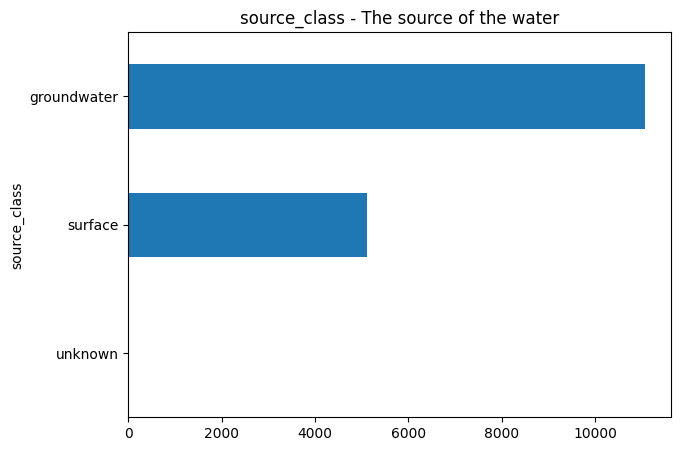

Aantal missing values voor deze variabele is:  0


In [68]:
fig, ax = plt.subplots(figsize=(7,5))
ax = df_train_x['source_class'].value_counts().sort_values().plot(kind='barh')
plt.title('source_class - The source of the water')
plt.show()

print('Aantal missing values voor deze variabele is: ' , df_train_x['source_class'].isnull().sum())

In [69]:
# fig, ax = plt.subplots(figsize=(7,5))
# ax = df_train_x['waterpoint_type'].value_counts().sort_values().plot(kind='barh')
# plt.title('waterpoint_type - The kind of waterpoint')
# plt.show()

# print('Aantal missing values voor deze variabele is: ' , df_train_x['waterpoint_type'].isnull().sum())

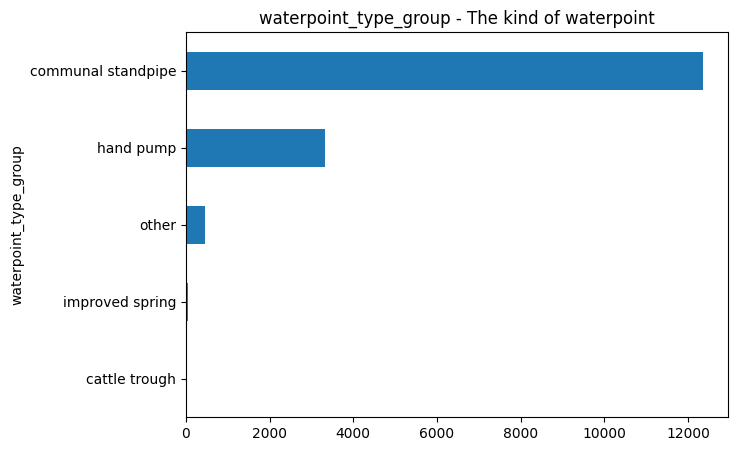

Aantal missing values voor deze variabele is:  0


In [70]:
fig, ax = plt.subplots(figsize=(7,5))
ax = df_train_x['waterpoint_type_group'].value_counts().sort_values().plot(kind='barh')
plt.title('waterpoint_type_group - The kind of waterpoint')
plt.show()

print('Aantal missing values voor deze variabele is: ' , df_train_x['waterpoint_type_group'].isnull().sum())

In [71]:
df_train_x_set = df_train_x[['id', 'gps_height', 'construction_year', 'amount_tsh', 'population',
                         'basin','extraction_type_class','management_group','payment_type', 
                         'quality_group', 'quantity', 'source_class', 'waterpoint_type_group','status_group']]

-----------

#### 5. Save the dataset that will be used

In [72]:
df_train_x_set.to_csv('../data/analysis_set.csv', index=False)

In [73]:
print('Het totaal aantal metingen was 59400, en is nu na cleaning: ', df_train_x['id'].count())

Het totaal aantal metingen was 59400, en is nu na cleaning:  16192
